## Sentiment Analysis: `Cranberries - YouTube Data`


I have conducted sentiment analysis on cranberries using YouTube's Comments about this topic. And saved the extracted Data as **`_Youtube_Comments.csv`** in the `Data` directory.

**Sourced from:**<br> 
Cranberry Farming Start to Finish | Jacob Searls Cranberry Co. | Luke Parmeter Productions
https://www.youtube.com/watch?v=pGWP86dZ-_0


<img src="./Images/cranberry_production.jpg" alt="Cranberry Production" style="float:left;width:474px;height:309px;"><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<p><small><strong><ins>Source</ins>:</strong> <em>Jackson Dream Team (2022)</em></small></p>

## Import Libraries

In [1]:
#!pip install --upgrade nltk
#!pip install textblob wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
#print(stopwords.words('english'))
#from nltk.tokenize import word_tokenize
#print(word_tokenize('testing string))
#nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')

from wordcloud import WordCloud#, STOPWORDS
from textblob import TextBlob

from collections import Counter

C:\Users\Foltos\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Dataset

In [4]:
df = pd.read_csv("./Data/_Youtube_Comments.csv")#, encoding = 'unicode_escape', engine ='python')
df2 = df.copy()
df.head(3)

,Comment
0,Wow!
1,#cranberrysauce #thanksgiving #cranberry
2,Cranberry Farming Start to Finish | Jacob Sear...


In [5]:
print ("The Comments contain {} words.".format(len(" ".join(words for words in df.Comment))))

The Comments contain 53871 words.


# EDA

## **`Initial Cleaning`**
I cleaned the Comments by removing `stopwords` (*e.g.*: ** i me my myself **),  `punctuations` (*e.g.*: **. ! ?**), `special characters` (*e.g.* **# |** ) and made all the words `lower case`.

In [6]:
# CLEAN DATA!!!
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

df.Comment = (df.Comment
            .str.lower()
            .replace([r'(#|!|…|\'|\\|\.|,|\(|\)|-|\’|\?|\||")', RE_stopwords], [' ', ''], regex=True)
            #.str.cat(sep=' ')
    )

After this general cleaning the data can be used for a general analysis of the most frequent words used in the Comments with the use of wordcloud (as seen below).

In [7]:
df.head(3)

,Comment
0,wow
1,cranberrysauce thanksgiving cranberry
2,cranberry farming start finish jacob searls...


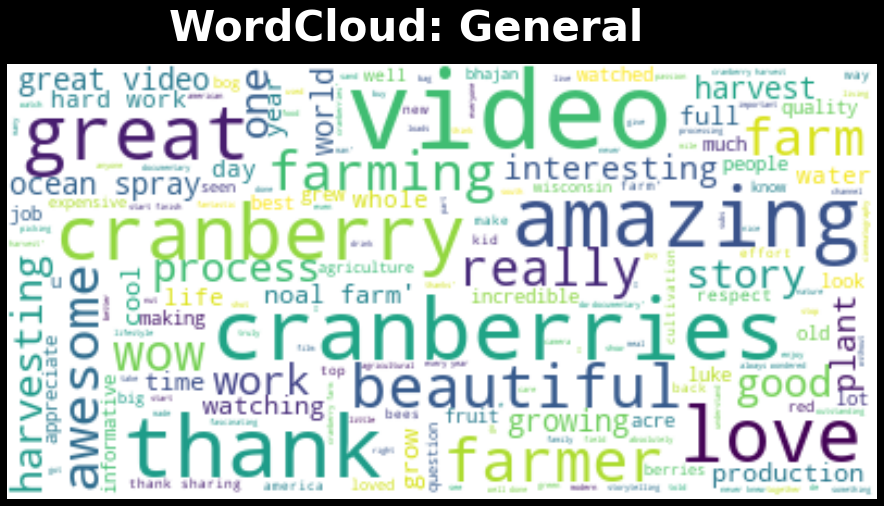

In [8]:
# WordCloud Creation: After Data Cleaning
wordcloud = WordCloud(
    max_font_size=50, 
    #max_words=100, 
    background_color="white").generate(str(df.Comment.values))

plt.figure( figsize=(40,8),
           # Border BG
           facecolor='black' )
plt.tight_layout(pad=0)

# Generated image display:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.suptitle("WordCloud: General",fontsize=42, fontweight ="bold",color="white") 

# Save image:
wordcloud.to_file("./Images/wordcloud_general_.png")
#plt.savefig("./Images/wordcloud_general3.png", format="png")
#plt.savefig('./Images/wordcloud_general4.jpg', bbox_inches='tight', dpi=150)
plt.savefig('./Images/wordcloud_general_title.png', bbox_inches='tight', dpi=250,format="png")

# NEEDS TO BE LAST - to be able to save the images!!!
plt.show()

Initial inspection of the results, show that the most used words are 'video', 'cranberries/cranberry' which is logical since the data has been acquired from videos about the agricultural production of cranberries. And it being from a video is of course going be mentioned.
The overall concensus seems to be positive with words like 'love','beautiful','amazing','awesome' being very popular. But this will be later analysed further. 

## **`Feature Selection`**
I added *positive*, *negative* and *neutral* score to all the comments extracted to be able to analyse the possible improvements Irish farmers could make in the agricultural production of cranberries.<br>
For the scoring process, I used the Textblob library which is renowned for its efficient and simplistic text processing in common natural language processing (NLP) tasks such as sentiment analysis. 

In [9]:
# Textblob
# Scoring: [-1,+1]
df["SentimentScore"] = df["Comment"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Sentiment Analysis: [<0:Negative, 0:Neutral, >0:Positive]
df["Sentiment"] = np.select([df["SentimentScore"]<0, df["SentimentScore"]== 0, df["SentimentScore"]>0],
                            ['neg', 'neu', 'pos'])

In [10]:
df

,Comment,SentimentScore,Sentiment
0,wow,0.100000,pos
1,cranberrysauce thanksgiving cranberry,0.000000,neu
2,cranberry farming start finish jacob searls...,0.000000,neu
3,luke parmeter,0.000000,neu
4,follow cranberry growing process year long ...,0.125000,pos
...,...,...,...
842,really nice,0.600000,pos
843,plain science cool man,0.067857,pos
844,grown shallow water,-0.333333,neg
845,interesting,0.500000,pos


## **`Positive Sentiment Analysis`**
I first extract all the positive comments and then split them up into the words they contain. I then count the frequency of these words and represent them in a dataframe that is then plotted with the top 10 displayed as well as a wordcloud is created for a more thorough investigation. Which is then saved as images to store the data.

             Frequency
Word                  
video              119
great               83
amazing             62
cranberries         53
love                52
...                ...
जी                   1
के                   1
non                  1
shani                1
dev                  1

[1017 rows x 1 columns]


<AxesSubplot: xlabel='Word'>

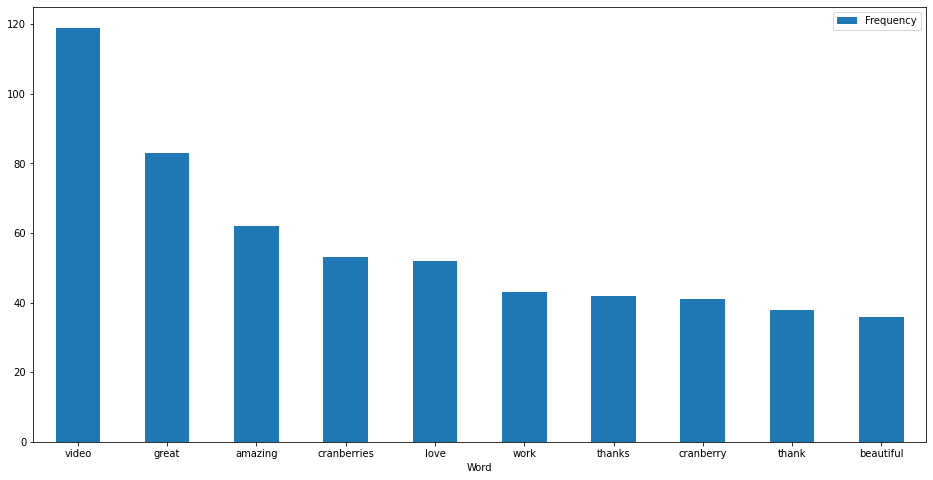

In [11]:
# Split positive words & find their frequency!

# SPLIT COMMENTS INTO WORDS
words=(df[df.Sentiment == 'pos'].Comment
        .str.cat(sep=' ')
        .split())

# GENERATE DF WITH WORD FREQUENCY
SIZE = len(set(words))#Size==unique_words
word_freq = pd.DataFrame(Counter(words).most_common(SIZE),
                    columns=['Word', 'Frequency']).set_index('Word')
print(word_freq)

# PLOT TOP 10 POSITIVE WORDS
word_freq.head(10).plot.bar(rot=0, figsize=(16,8), width=0.5)

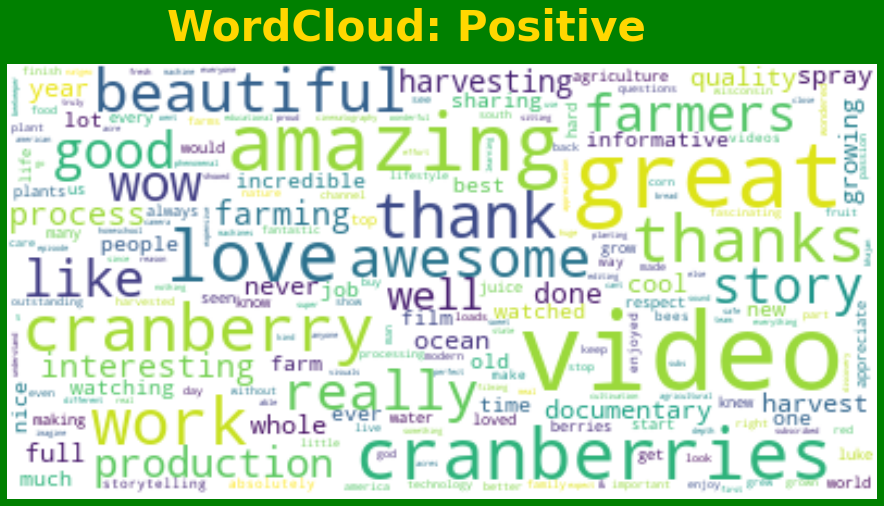

In [12]:
# POSITIVE Sentiment:
wordcloud = WordCloud(
    max_font_size=50, 
    #max_words=100, 
    background_color="white").generate_from_frequencies(word_freq.to_dict()['Frequency'])#str(df[df.Sentiment == 'pos'].Comment.values))
#plt.title('POSITIVE')

plt.figure( figsize=(40,8),           
           # Border BG
           facecolor='green' )
plt.tight_layout(pad=0)

# Generated image display:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.suptitle("WordCloud: Positive",fontsize=42, fontweight ="bold",color="gold") 

# Save image:
wordcloud.to_file("./Images/wordcloud_positive_.png")
#plt.savefig("./Images/wordcloud_general3.png", format="png")
#plt.savefig('./Images/wordcloud_general4.jpg', bbox_inches='tight', dpi=150)
plt.savefig('./Images/wordcloud_positive_title.png', bbox_inches='tight', dpi=250,format="png")

# NEEDS TO BE LAST - to be able to save the images!!!
plt.show()

There seems to be a positive sentiment towards cranberries:
- as a product: for their *`quality`*, the *`lifestyle`* the consumption promotes.
- in production: which promotes *`job`*s

A recommendation that seems obvious in this case study: is that people are . People already have a positive feedback to cranberries but still *`wonder`* and are very *`curious`* about the production and processing of this healthy product. They seem to enjoy *`watching`* videos about it to become informed.

If the Irish farmers were open to the idea of filming:
- the *`growing`* process
- the *`spray`* they use during production of this plant 
- how they *`harvest`*, what *`time`* or *`season`*
- how they cranberries are *`processed`* to make *`juice`*
- how they encourage organic production (help sustain the population of *`bees`* and the not contribute to ocean waste).

This could increase the trust people have for their products and possibly increase their sales. People nowadays more than ever are looking for healthy options, if Irish farmers can demonstrate this, they can tap into a huge market.

As Irish people trust Irish brands, other nations could also become familiar with them and become a trusting body too.

## **`Negative Sentiment Analysis`**
I first extract all the negative comments and then split them up into the words they contain. I then count the frequency of these words and represent them in a dataframe that is then plotted with the top 10 displayed as well as a wordcloud is created for a more thorough investigation. Which is then saved as images to store the data.

           Frequency
Word                
one                7
expensive          7
hard               6
work               6
video              6
...              ...
closed             1
axel               1
f                  1
director           1
cut                1

[200 rows x 1 columns]


<AxesSubplot: xlabel='Word'>

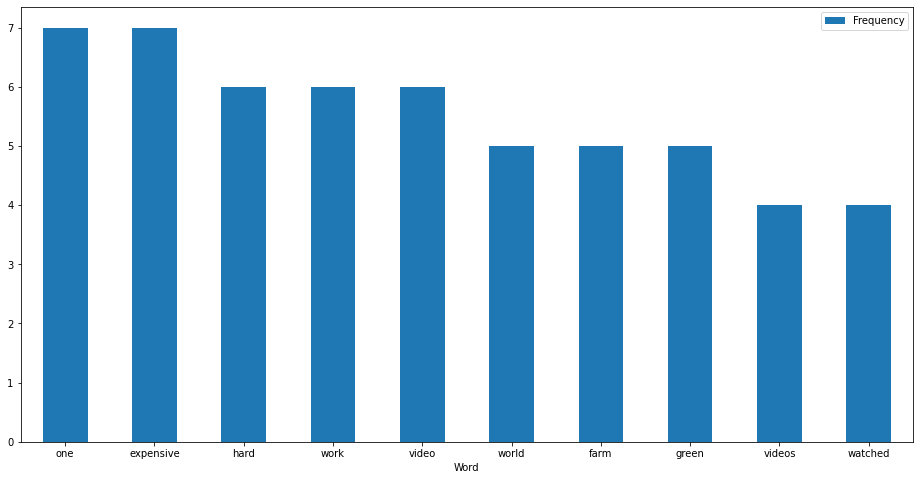

In [13]:
# Split negative words & find their frequency!

# SPLIT COMMENTS INTO WORDS
words=(df[df.Sentiment == 'neg'].Comment
        .str.cat(sep=' ')
        .split())

# GENERATE DF WITH WORD FREQUENCY
SIZE = len(set(words))#Size==unique_words
word_freq = pd.DataFrame(Counter(words).most_common(SIZE),
                    columns=['Word', 'Frequency']).set_index('Word')
print(word_freq)

# PLOT TOP 10 NEGATIVE WORDS
word_freq.head(10).plot.bar(rot=0, figsize=(16,8), width=0.5)

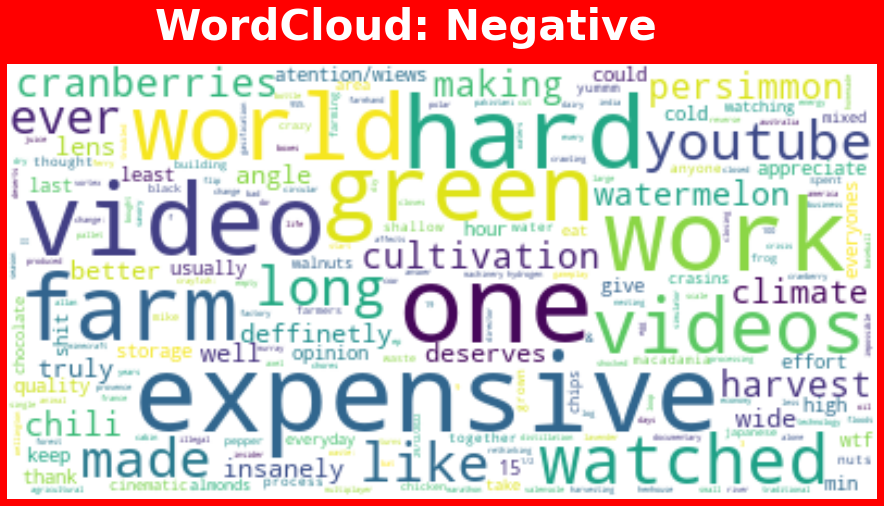

In [14]:
# NEGATIVE Sentiment:
wordcloud = WordCloud(
    max_font_size=50, 
    #max_words=100, 
    background_color="white").generate_from_frequencies(word_freq.to_dict()['Frequency'])#str(df[df.Sentiment == 'neg'].Comment.values))
#plt.title('Negative')

plt.figure( figsize=(40,8),           
           # Border BG
           facecolor='red' )
plt.tight_layout(pad=0)

# Generated image display:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.suptitle("WordCloud: Negative",fontsize=42, fontweight ="bold",color="white") 

# Save image:
wordcloud.to_file("./Images/wordcloud_negative_.png")
#plt.savefig("./Images/wordcloud_general3.png", format="png")
#plt.savefig('./Images/wordcloud_general4.jpg', bbox_inches='tight', dpi=150)
plt.savefig('./Images/wordcloud_negative_title.png', bbox_inches='tight', dpi=250,format="png")

# NEEDS TO BE LAST - to be able to save the images!!!
plt.show()

The negative sentiment towards cranberries seems to be directed towards how *`insanely`* *`expensive`* it is. On top of that people are uninformed about storage options and process of making cranberries . They complain about its *`hard`* structure and *`quality`* of taste as *`truly sh*t`*.
People turn to *`watermelon`*, *`persimmon`*, *`nuts`*, *`walnuts`*, *`almonds`* etc. as alternatives. 

A recommendation that seems obvious in this case study: is that people need to be informed about cranberries. They are an acquired taste and need special care in their handling and the variety of ways it can be prepared and consummed not just raw which changes the texture and taste slightly for people with sensitivities. 

But once this is achieved people can get familiar with this amazing product, that is healthy and lasts a long time. The same recommendation as in positive sentiment can be made in this case too. If Irish farmers invest in familiarising people with cranberries, they could gain a lot of prospective buyers.

## **`Neutral Sentiment Analysis`**
I first extract all the neutral comments and then split them up into the words they contain. I then count the frequency of these words and represent them in a dataframe that is then plotted with the top 10 displayed as well as a wordcloud is created for a more thorough investigation. Which is then saved as images to store the data.

             Frequency
Word                  
farm                36
cranberry           33
noal                17
harvest             17
cranberries         16
...                ...
öyle                 1
kolaysa              1
mabelmatiz           1
hotel                1
room                 1

[893 rows x 1 columns]


<AxesSubplot: xlabel='Word'>

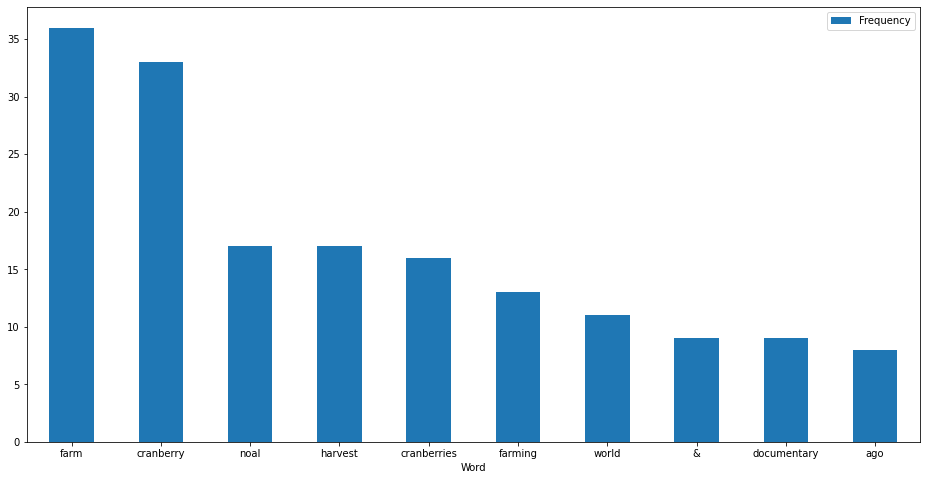

In [15]:
# Split neutral words & find their frequency!

# SPLIT COMMENTS INTO WORDS
words=(df[df.Sentiment == 'neu'].Comment
        .str.cat(sep=' ')
        .split())

# GENERATE DF WITH WORD FREQUENCY
SIZE = len(set(words))#Size==unique_words
word_freq = pd.DataFrame(Counter(words).most_common(SIZE),
                    columns=['Word', 'Frequency']).set_index('Word')
print(word_freq)

# PLOT TOP 10 Neutral WORDS
word_freq.head(10).plot.bar(rot=0, figsize=(16,8), width=0.5)

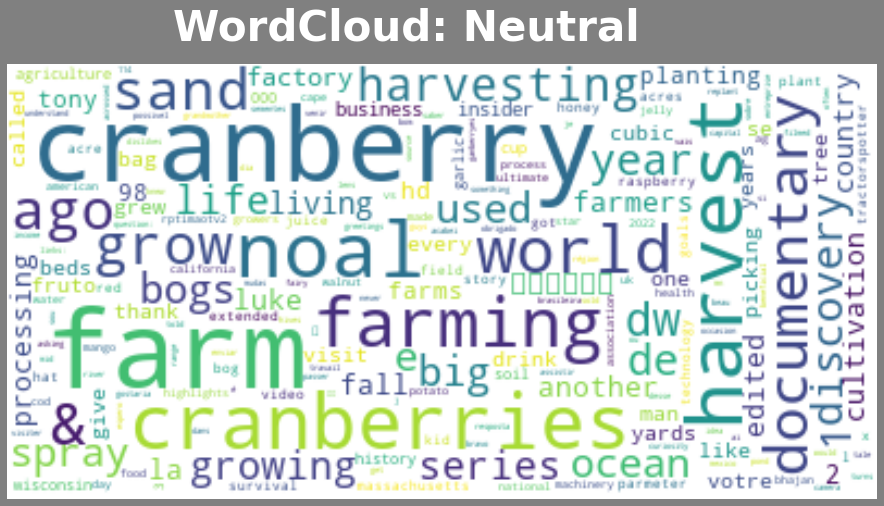

In [16]:
# Neutral Sentiment:
wordcloud = WordCloud(
    max_font_size=50, 
    #max_words=100, 
    background_color="white").generate_from_frequencies(word_freq.to_dict()['Frequency'])#str(df[df.Sentiment == 'neu'].Comment.values))
#plt.title('Neutral')

plt.figure( figsize=(40,8),           
           # Border BG
           facecolor='grey' )
plt.tight_layout(pad=0)

# Generated image display:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.suptitle("WordCloud: Neutral",fontsize=42, fontweight ="bold",color="white") 

# Save image:
wordcloud.to_file("./Images/wordcloud_neutral_.png")
#plt.savefig("./Images/wordcloud_general3.png", format="png")
#plt.savefig('./Images/wordcloud_general4.jpg', bbox_inches='tight', dpi=150)
plt.savefig('./Images/wordcloud_neutral_title.png', bbox_inches='tight', dpi=250,format="png")

# NEEDS TO BE LAST - to be able to save the images!!!
plt.show()

The neutral sentiment towards cranberries seems to be the same as for all the other sentiments, people being confused about cranberries. 

The same recommendation can be made here too. Informing is the key to making people discover this amazing berry.

## **`Conclusion to Sentiment Analysis`**
Most Comments seem to be neutral about cranberries, confused about it.
Even in positive and negative comments, there are confusion present.
Positive comments show that people were informed about its health benefits but don't know what to do with them.

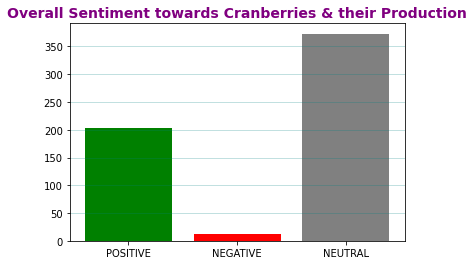

In [17]:
TYPES = ['POSITIVE','NEGATIVE', 'NEUTRAL']
SUM = [df[df.SentimentScore>0].SentimentScore.sum(),
       (df[df.SentimentScore<0].SentimentScore.sum()*-1),
       df[df.SentimentScore==0].SentimentScore.count()      
      ]
colors = ['green','red','grey']
plt.bar(TYPES,SUM,color=colors)#, color=list('green','red','grey'))
plt.grid(axis='y', alpha=0.3, color='teal')
plt.title('Overall Sentiment towards Cranberries & their Production', fontsize=14, fontweight='bold',color='Purple')
plt.show()

After this analysis it has become abundantly clear that in all types of sentiment people possess towards cranberries, they are confused.

This needs to be mended. If Irish farmers can educate people about this amazing product, they could gain new opportunities and possibly compete with top global producers like the US and Canada.

<hr>

Source: https://scienceagri.com/9-worlds-biggest-cranberry-producers/